# Exploratory Data Analysis using mpg2 dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* Check Missing values
* Fill Missing values
* Check and remove outliers
* Compute simple statistics on single variables
* Basic Plots
* Investigate Categorial Variables
* Compute simple aggregation, group by categorial variable
* Facet Grid
* Build simple linear regression model

In [34]:
df = pd.read_csv("data/mpg2.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [35]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
395,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
396,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
397,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
398,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
399,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [36]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,399.000000,400.000000,400.000000,394.000000,400.000000,400.000000,400.000000
mean,23.681203,5.457500,193.868750,105.322335,2967.530000,15.545250,80.857500
std,8.486141,1.703069,104.880853,42.158313,845.784762,2.777754,97.270402
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.750000,75.250000,2225.250000,13.800000,73.000000
50%,23.000000,4.000000,148.500000,94.500000,2797.500000,15.500000,76.000000
75%,29.000000,8.000000,263.250000,128.000000,3606.000000,17.125000,79.000000
max,90.000000,8.000000,455.000000,450.000000,5140.000000,24.800000,2020.000000


In [37]:
df.shape

(400, 9)

## Check Missing Data

In [38]:
df.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [39]:
df['horsepower'].head(20)

0     130.0
1     165.0
2     150.0
3     150.0
4     140.0
5     198.0
6     220.0
7     215.0
8     225.0
9     450.0
10    190.0
11    170.0
12    160.0
13    150.0
14    225.0
15     95.0
16     95.0
17     97.0
18     85.0
19     88.0
Name: horsepower, dtype: float64

In [40]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 450., 190., 170.,
       160.,  95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210.,
       193.,  nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,
        76.,  65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145.,
       137., 158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,
        83.,  78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,
        53.,  81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,
        63.,  48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,
        62., 132.,  84.,  64.,  74., 116.,  82.])

In [41]:
np.isnan(df.horsepower)

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: horsepower, Length: 400, dtype: bool

In [42]:
bad_data = df [ np.isnan(df.horsepower) ]

In [43]:
bad_data.shape

(6, 9)

In [44]:
bad_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
34,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
128,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
332,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
338,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
356,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
376,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


## Remove missing data rows

In [45]:
df2 = df[ ~np.isnan(df.horsepower)]
df2.shape

(394, 9)

In [46]:
df2.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

# Or we can impute missing value for filling in null**

In [47]:
var = 'horsepower'
print(df[var].mean())
print(df[var].median())

105.32233502538071
94.5


<Axes: ylabel='horsepower'>

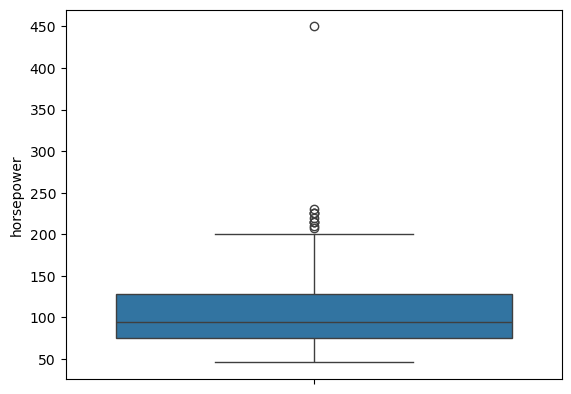

In [48]:
sns.boxplot(y=df[var])

In [49]:
df[var].shape

(400,)

In [50]:
oldval = df[var]
oldval.describe()

count    394.000000
mean     105.322335
std       42.158313
min       46.000000
25%       75.250000
50%       94.500000
75%      128.000000
max      450.000000
Name: horsepower, dtype: float64

<Axes: >

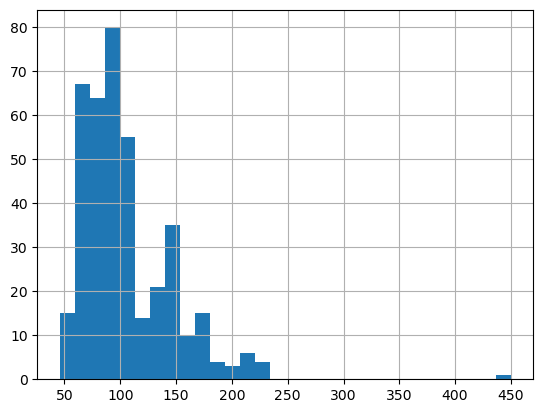

In [51]:
# change the number of bins to see how the histogram changes
oldval.hist(bins=30)

**Since there is a 450 outliers, it may be better to use median to fill the missing value**

In [52]:
#newval = df[var].fillna(df[var].mean())
newval = df[var].fillna(df[var].median())
newval.describe()

count    400.000000
mean     105.160000
std       41.860859
min       46.000000
25%       76.000000
50%       94.500000
75%      125.000000
max      450.000000
Name: horsepower, dtype: float64

# Now overwrite the horsepower column of the original dataframe

In [53]:
# update the series with the newval
df[var] = newval
print(df.describe())
df.isnull().any()

              mpg   cylinders  displacement  horsepower       weight  \
count  399.000000  400.000000    400.000000  400.000000   400.000000   
mean    23.681203    5.457500    193.868750  105.160000  2967.530000   
std      8.486141    1.703069    104.880853   41.860859   845.784762   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.750000   76.000000  2225.250000   
50%     23.000000    4.000000    148.500000   94.500000  2797.500000   
75%     29.000000    8.000000    263.250000  125.000000  3606.000000   
max     90.000000    8.000000    455.000000  450.000000  5140.000000   

       acceleration   model_year  
count    400.000000   400.000000  
mean      15.545250    80.857500  
std        2.777754    97.270402  
min        8.000000    70.000000  
25%       13.800000    73.000000  
50%       15.500000    76.000000  
75%       17.125000    79.000000  
max       24.800000  2020.000000  


mpg              True
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

# Horsepower has been "fixed", but there is still missing value in the mpg column, let's fix it as well

In [54]:
df['mpg'] = df['mpg'].fillna(df['mpg'].mean())
print(df.shape)
df.isnull().any()

(400, 9)


mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

<Axes: xlabel='horsepower', ylabel='mpg'>

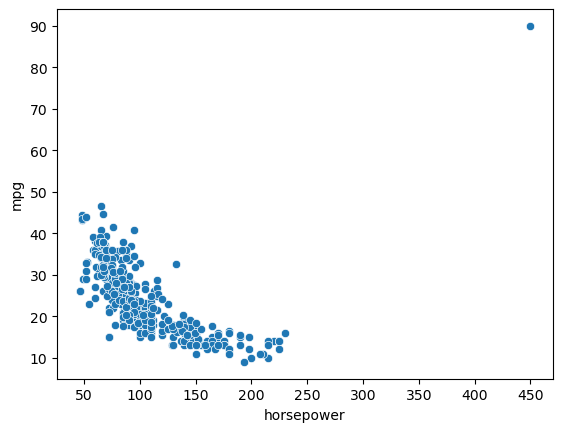

In [55]:
sns.scatterplot(x='horsepower', y = 'mpg', data=df)

## See something is wrong with the 90 mpg. It is an outlier, let's remove it

# Remove outliers

<Axes: xlabel='horsepower', ylabel='mpg'>

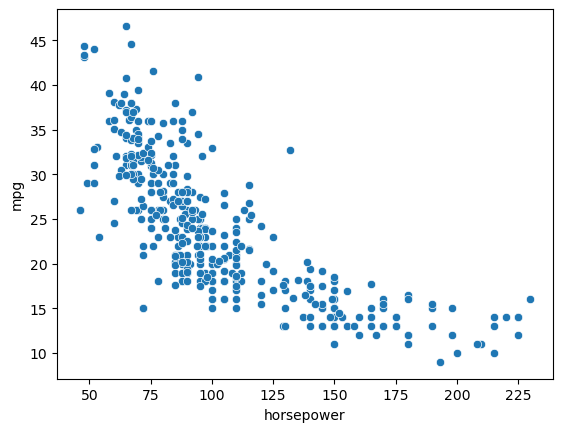

In [56]:
df = df[ df['mpg'] <= 80]
sns.scatterplot(x='horsepower', y = 'mpg', data=df)

## Now, we have all good data points. Let's check on simple Statistics on a Single Variate

In [57]:
# Pick horsepower as the variable that we are interested
var = 'horsepower'
series = df[var]
type(series)
print(series.describe())

count    399.000000
mean     104.295739
std       38.173355
min       46.000000
25%       76.000000
50%       94.500000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64


In [58]:
print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 104.29573934837093
Stdev: 38.17335500126359
Min: 46.0
Max: 230.0
Median: 94.5
Mode: 0    150.0
Name: horsepower, dtype: float64
Skew: 1.108413253920598
Kurtosis: 0.7744686245024681


## Simple plots using Seaborn

<Axes: xlabel='horsepower', ylabel='Density'>

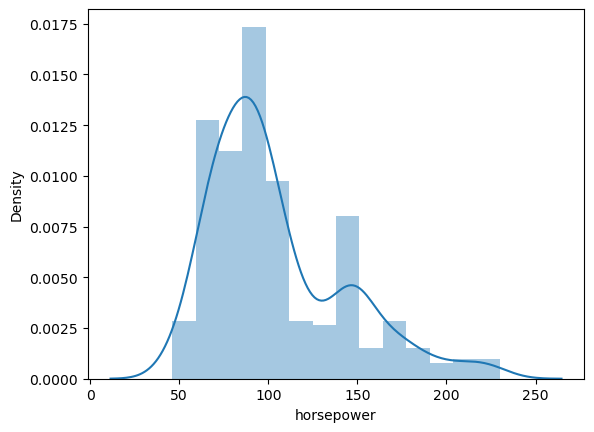

In [59]:
sns.distplot(series)

**Pick other variables**

<Axes: xlabel='mpg', ylabel='Density'>

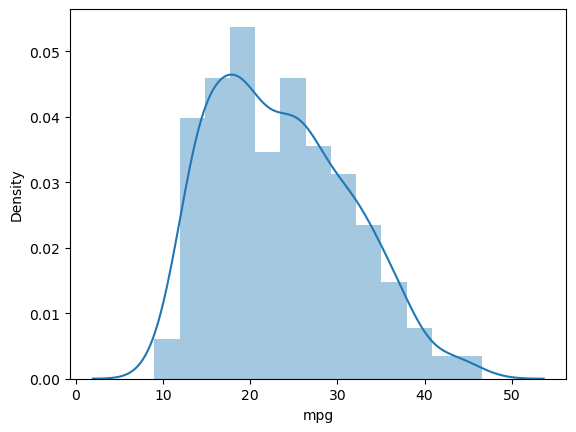

In [60]:
sns.distplot(df['mpg'])

<Axes: xlabel='origin', ylabel='weight'>

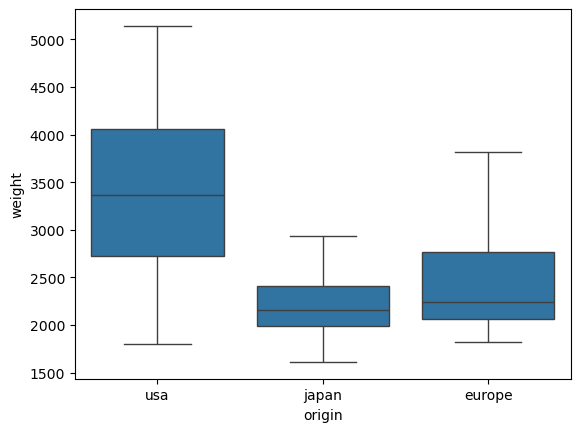

In [61]:
sns.boxplot(x='origin', y = 'weight', data=df)

## Correlation

In [62]:
df.corr()

ValueError: could not convert string to float: 'usa'

# So weight has the highest correlation with mpg based on correlation

<Axes: xlabel='weight', ylabel='mpg'>

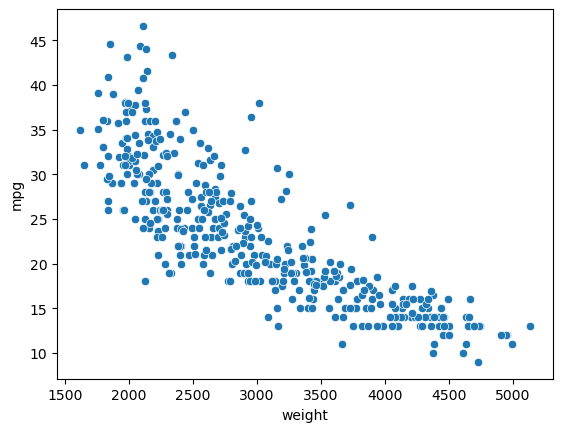

In [63]:
sns.scatterplot(x='weight', y = 'mpg', data=df)

# other high correlation variable

<Axes: xlabel='weight', ylabel='displacement'>

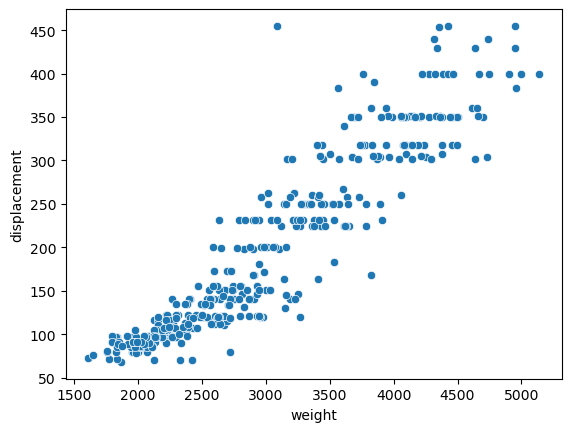

In [64]:
sns.scatterplot(x='weight', y ='displacement', data =df)

# In fact, one can do a "Pair Plot"

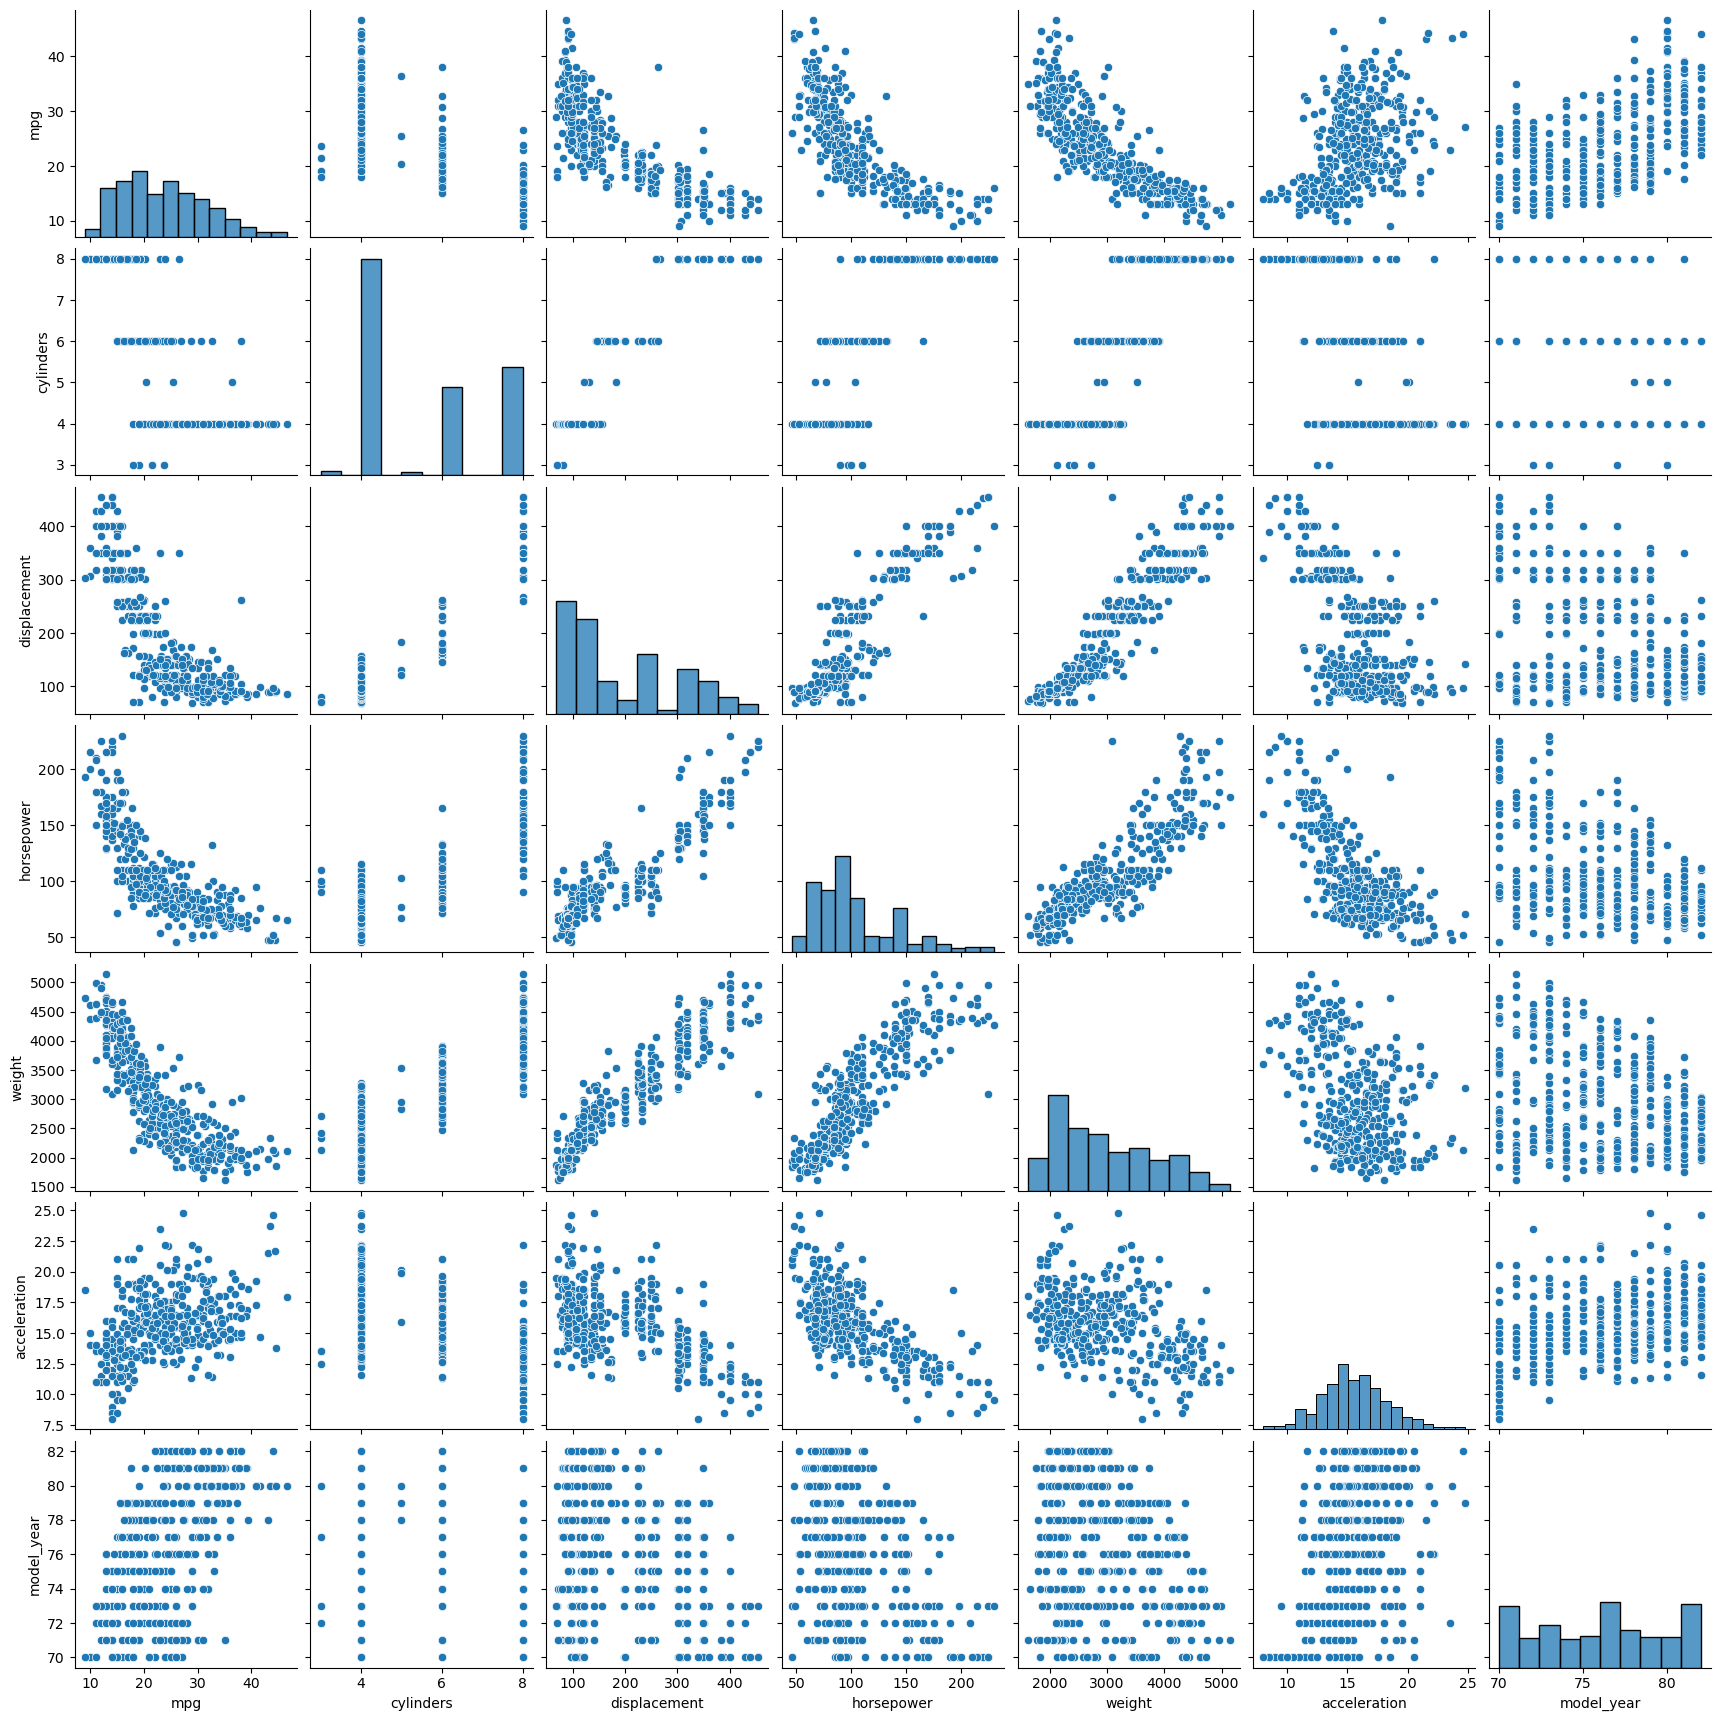

In [65]:
sns.pairplot(data=df)

# Now focus on the relationship between horsepower and weight. Horsepower can pretty much "determine" the weight

<Axes: xlabel='horsepower', ylabel='weight'>

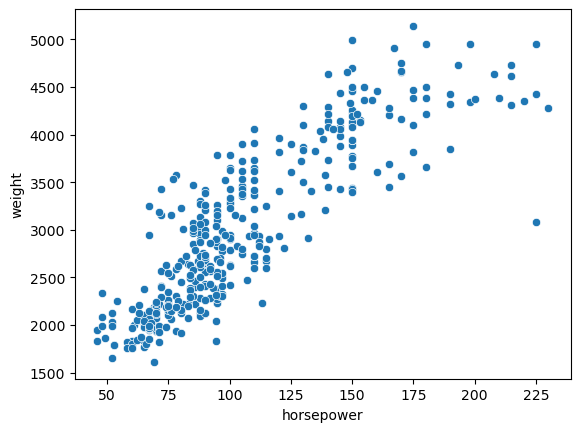

In [66]:
sns.scatterplot(x='horsepower', y = 'weight', data = df)

# Fit a linear Regression model (will spend more time in a separate notebook on regression)

<Axes: >

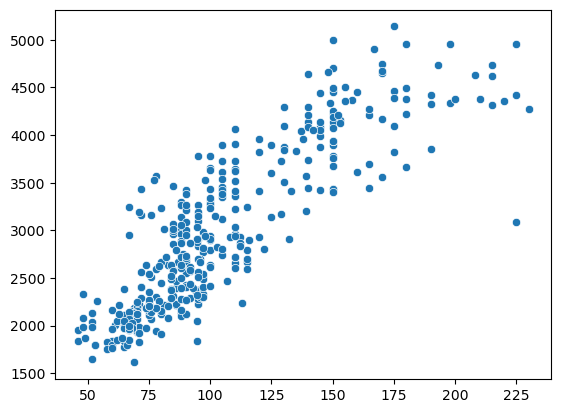

In [67]:
# Extract a numpy array from the dataframe
X = df['horsepower'].values
Y = df['weight'].values
sns.scatterplot(x=X, y=Y)

In [68]:
# create a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [69]:
# Need a 2D numpy array, so call reshape(-1, 1)
X = df['horsepower'].values.reshape(-1,1)
Y = df['weight'].values.reshape(-1,1)

In [70]:
# Fit the model
model.fit(X, Y)

LinearRegression()

In [71]:
# now make the prediction
Y_pred = model.predict(X)

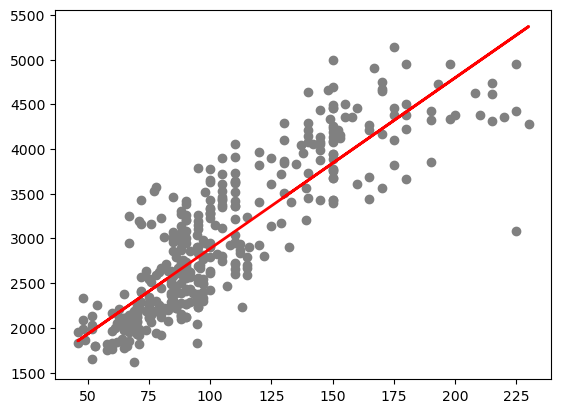

In [72]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [73]:
print(model.intercept_)
print(model.coef_)

[974.83257201]
[[19.11613408]]


# Now investigate categorical variable

In [74]:
# count
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [75]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [76]:
df['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [77]:
df['origin'].value_counts()

origin
usa       249
japan      80
europe     70
Name: count, dtype: int64

# Group By functions

In [78]:
df.groupby(['origin']).describe()

mpg                                                       cylinders  \
        count       mean       std   min   25%    50%     75%   max     count   
origin                                                                          
europe   70.0  27.891429  6.723930  16.2  24.0  26.50  30.650  44.3      70.0   
japan    80.0  30.366015  6.098526  18.0  25.3  31.55  34.025  46.6      80.0   
usa     249.0  20.083534  6.402892   9.0  15.0  18.50  24.000  39.0     249.0   

                  ... acceleration       model_year                       \
            mean  ...          75%   max      count       mean       std   
origin            ...                                                      
europe  4.157143  ...       18.900  24.8       70.0  75.814286  3.469506   
japan   4.100000  ...       17.525  21.0       80.0  77.362500  3.698251   
usa     6.248996  ...       16.900  22.2      249.0  75.610442  3.677094   

                                      
         min   25%   50%   75%   max  
origin                                
europe  70.0  73.0  76.0  79.0  82.0  
japan   70.0  74.0  78.0  81.0  82.0  
usa     70.0  73.0  76.0  79.0  82.0  

[3 rows x 56 columns]

In [79]:
df.groupby(['origin'])['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,2423.300000,490.043191,1825.0,2067.25,2240.0,2769.75,3820.0
japan,80.0,2221.312500,318.463224,1613.0,1985.00,2157.5,2408.75,2930.0
usa,249.0,3361.931727,794.792506,1800.0,2720.00,3365.0,4054.00,5140.0


In [80]:
df.groupby(['origin'])['weight'].std()

origin
europe    490.043191
japan     318.463224
usa       794.792506
Name: weight, dtype: float64

In [81]:
df.groupby(['origin'])['weight'].mean()

origin
europe    2423.300000
japan     2221.312500
usa       3361.931727
Name: weight, dtype: float64

In [82]:
df.groupby(['origin'])['weight'].skew()

origin
europe    0.833176
japan     0.500697
usa       0.085203
Name: weight, dtype: float64

In [83]:
# for kurtosis, df.groupby(['origin'])['weight'].kurtosis() will NOT work

In [84]:
df.groupby(['origin'])['weight'].apply(pd.DataFrame.kurtosis)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [85]:
print("USA kurtosis ", df[df['origin'] == 'usa']['weight'].kurtosis())
print("Europe kurtosis ", df[df['origin'] == 'europe']['weight'].kurtosis())
print("Japan kurtosis ", df[df['origin'] == 'japan']['weight'].kurtosis())

USA kurtosis  -0.9565914528985062
Europe kurtosis  -0.19030879004757617
Japan kurtosis  -0.34725957538370134


# FacetGrid

<Axes: >

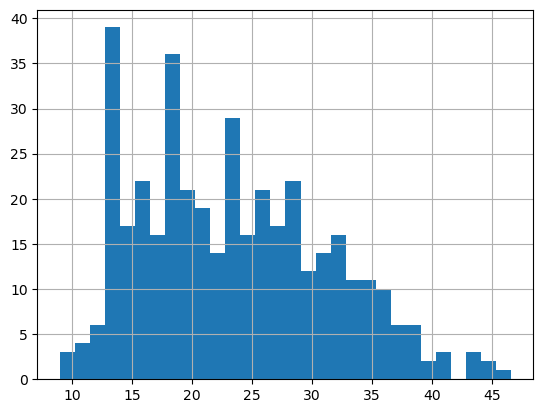

In [86]:
df['mpg'].hist(bins=30)

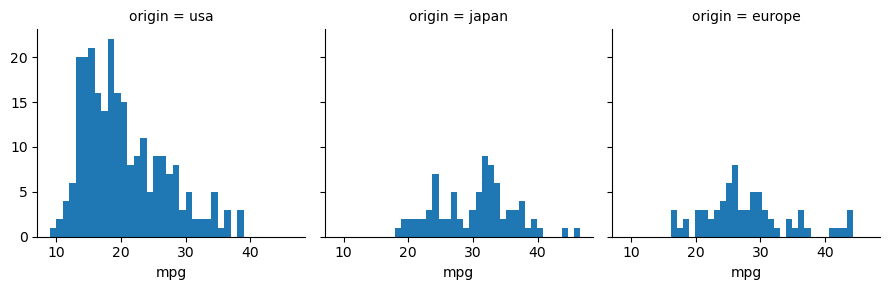

In [87]:
g = sns.FacetGrid(df, col = 'origin')
g = g.map(plt.hist, 'mpg', bins=30)

<Axes: >

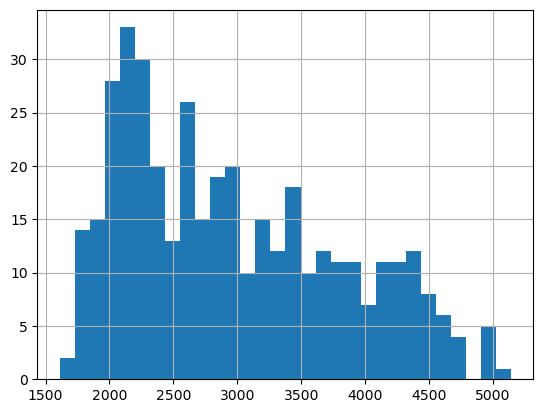

In [88]:
df['weight'].hist(bins=30)

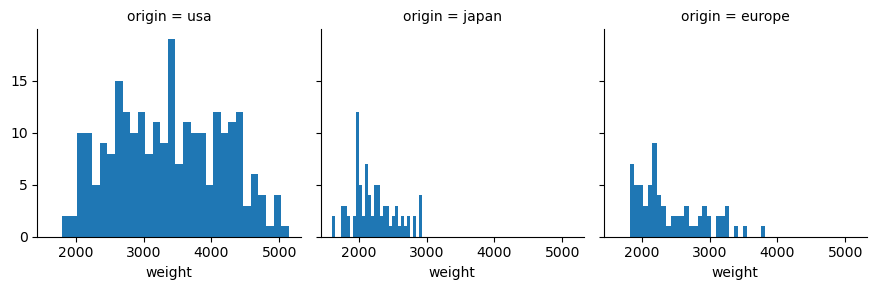

In [89]:
g = sns.FacetGrid(df, col = 'origin')
g = g.map(plt.hist, 'weight', bins=30)

<Axes: xlabel='horsepower', ylabel='mpg'>

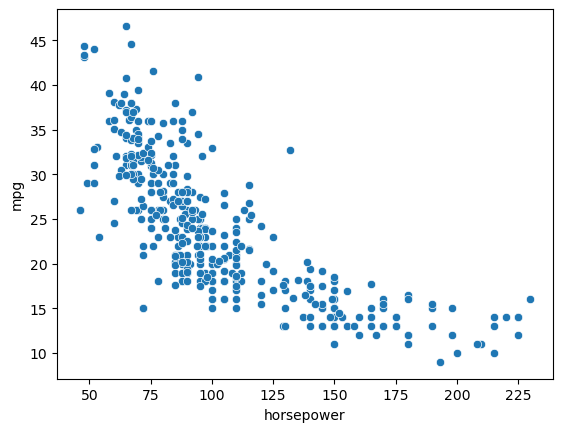

In [90]:
sns.scatterplot(x='horsepower', y = 'mpg', data=df)

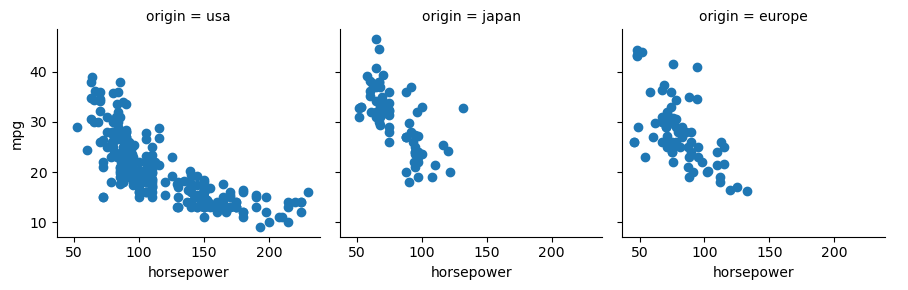

In [91]:
g = sns.FacetGrid(df, col = 'origin')
g = (g.map(plt.scatter, "horsepower", "mpg").add_legend())